In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
#!pip install xgboost
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

#!pip install catboost
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

In [3]:
df = pd.read_csv(f"/kaggle/input/hranalyticsav/train_data.csv")

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

# Data Preprocessing

### Fill nulls

In [6]:
# Fill missing values in 'education' with the mode
df['education'] = df['education'].fillna(df['education'].mode()[0])

# Fill missing values in 'previous_year_rating' with the median
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())



###  One Hot-Encoding

In [7]:
label_encoders = {}
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


### Normalize numeric fields

In [ ]:
# scaler = StandardScaler()
# numerical_columns = ['age', 'length_of_service', 'avg_training_score', 'no_of_trainings', 'previous_year_rating']
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### After Preprocessing steps 

In [8]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,33,0,1,2,1,29,1.0,2,0,0,45,0


# Data Split


In [9]:
# # Define features and target variable
# X = df.drop(['employee_id', 'is_promoted'], axis=1)  # Exclude irrelevant columns
# y = df['is_promoted']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)

### Under-Sampling 

In [71]:
# rus = RandomUnderSampler(random_state=42)
# X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


-

In [187]:
# # class count
# class_count_0, class_count_1 = df['is_promoted'].value_counts()
# class_count_1

In [188]:
# # Separate class
# class_0 = df[df['is_promoted'] == 0]
# class_1 = df[df['is_promoted'] == 1]# print the shape of the class
# print('class 0:', class_0.shape)
# print('class 1:', class_1.shape)

In [189]:
# class_0_under = class_0.sample(class_count_1)

# newdf = pd.concat([class_0_under, class_1], axis=0)

# print("total class of 1 and0:",newdf['is_promoted'].value_counts())# plot the count after under-sampeling
# newdf['is_promoted'].value_counts().plot(kind='bar', title='count (target)')

In [190]:
# # Define features and target variable
# X = newdf.drop(['employee_id', 'is_promoted'], axis=1) 
# y = newdf['is_promoted']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)
# print(X_train.shape)
# print(X_test.shape)

### Over-Sampling 

In [ ]:
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


-

In [186]:
# class count
class_count_0, class_count_1 = df['is_promoted'].value_counts()
class_count_1

4668

In [106]:
# Separate class
class_0 = df[df['is_promoted'] == 0]
class_1 = df[df['is_promoted'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (50140, 14)
class 1: (4668, 14)


total class of 1 and0: is_promoted
1    50140
0    50140
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='is_promoted'>

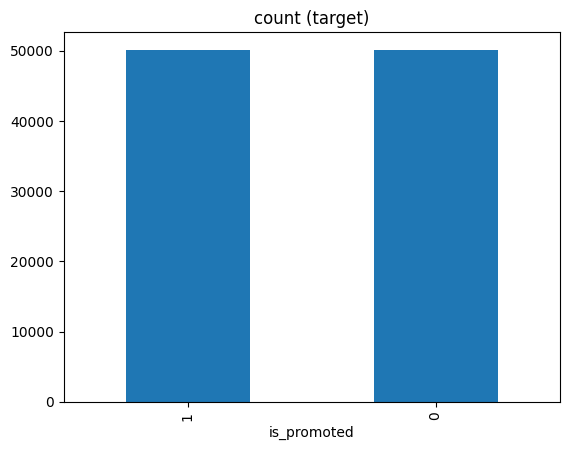

In [107]:
# class_0_under = class_0.sample(15000)
class_1_over = class_1.sample(class_count_0, replace=True)

newdf= pd.concat([class_1_over,class_0], axis=0)

print("total class of 1 and0:",newdf['is_promoted'].value_counts())
newdf['is_promoted'].value_counts().plot(kind='bar', title='count (target)')

# Data Splitting after Over-sampling

In [226]:
# Define features and target variable
X = newdf.drop(['employee_id', 'is_promoted'], axis=1) 
y = newdf['is_promoted']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(70196, 12)
(30084, 12)


# Model Training 

### Logistic Regression

In [227]:
# LR = LogisticRegression(max_iter=1000, class_weight='balanced')  # Use 'balanced' to handle class imbalance

# LR.fit(X_train, y_train)

### Random Forest Classifier (Best F1-Score)

In [231]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=120, random_state=42, class_weight='balanced')

# Train the model
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=120,
                       random_state=42)

### XGBoost

In [185]:
# # Initialize XGBoost model
# xgb= xgb.XGBClassifier()

# # Train the model
# xgb.fit(X_train, y_train)

### AdaBoost

In [184]:
# # Initialize AdaBoost model
# ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# # Train the model
# ada.fit(X_train, y_train)

### SVM

In [ ]:
# # Initialize SVM model
# svm = SVC(kernel='linear', class_weight='balanced', probability=True)

# # Train the model
# svm.fit(X_train, y_train)

### CatBoost (2nd Best F1-Score)

In [162]:
# # Initialize CatBoost model
# cat = CatBoostClassifier(iterations=600, learning_rate=0.6, depth=12, random_state=40, verbose=False)

# # Train the model
# cat.fit(X_train, y_train)


### Neural Network

In [ ]:
# # Split the data into train and test sets
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# # Further split the training set into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)


In [ ]:
# # Build Neural Network Model
# model = Sequential()
# model.add(Dense(64, input_shape=(X_train.shape[1],)))
# model.add(BatchNormalization())  # Batch Normalization
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))  # Single output unit with sigmoid activation

# # Compile the model with a larger learning rate
# optimizer = Adam(learning_rate=0.01)  # Increased learning rate
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


In [ ]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Accuracy: {accuracy}")

In [ ]:
# # Predicting the Test set results
# y_pred_prob = model.predict(X_test)  # Get predicted probabilities
# y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# # No need to use argmax since y_test is already binary
# y_test_argmax = y_test  # y_test is already in 0 or 1 format

In [ ]:
# # Confusion Matrix and Classification Report
# conf_matrix = confusion_matrix(y_test_argmax, y_pred)
# class_report = classification_report(y_test_argmax, y_pred)

# print(f"Confusion Matrix:\n{conf_matrix}")
# print(f"Classification Report:\n{class_report}")

### Prediction

In [233]:
# Predict on the testing data
y_pred = rf.predict(X_test)

# Evaluation

In [234]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9842773567344768
Confusion Matrix:
[[14579   463]
 [   10 15032]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15042
           1       0.97      1.00      0.98     15042

    accuracy                           0.98     30084
   macro avg       0.98      0.98      0.98     30084
weighted avg       0.98      0.98      0.98     30084



In [235]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'random_forest_model22.pkl')
 
print("Model saved to random_forest_model.pkl")

Model saved to random_forest_model.pkl


In [238]:
from IPython.display import FileLink

# Display a link to download the file
FileLink('/kaggle/working/random_forest_model22.pkl')

/kaggle/working/random_forest_model22.pkl